# Credit Card Fraud Detection

In [1]:
## The code can be majourly divided into 2 parts
# 1. Data Cleaning
# 2. Model Training

In [2]:
#Importing Libraries
## Pandas
import pandas as pd
## Matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
## Sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
## Seaborn
import seaborn as sns
## Missingno
import missingno as msno
# Warnings
import warnings 
#Configuring working Envoirnment
pd.set_option('display.max_columns', None)
sns.set_style('darkgrid')
## to ignore warning in the output
warnings.filterwarnings('ignore')

<p style="font-size:20px">Dataset From Kaggle : <a href="Source From Kaggle : https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud">https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud</a></p>

In [3]:
##Data Set Discription 
## Source From Kaggle : https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
## Title : Credit Card Fraud Detection
## Anonymized credit card transactions labeled as fraudulent or genuine
## Context / Goal / ROI : Identifying the Fradulent credit card tranctions.
## The output variable / The Variable of interest : Class(0,1) 
## 1 = Fraud
## 0 = Legit

In [4]:
## reading dataset
df = pd.read_csv('creditcard.csv')
## displaying first five rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
## shape of dataset
print("Rows :",df.shape[0])
print("Columns :",df.shape[1])

Rows : 284807
Columns : 31


In [7]:
## checking if there exist any null values in the dataset
temp = df.isnull().sum()
print("Number of null values in each column:")
for i in temp.keys():
    print(f"->    {i} : {temp[i]}")

Number of null values in each column:
->    Time : 0
->    V1 : 0
->    V2 : 0
->    V3 : 0
->    V4 : 0
->    V5 : 0
->    V6 : 0
->    V7 : 0
->    V8 : 0
->    V9 : 0
->    V10 : 0
->    V11 : 0
->    V12 : 0
->    V13 : 0
->    V14 : 0
->    V15 : 0
->    V16 : 0
->    V17 : 0
->    V18 : 0
->    V19 : 0
->    V20 : 0
->    V21 : 0
->    V22 : 0
->    V23 : 0
->    V24 : 0
->    V25 : 0
->    V26 : 0
->    V27 : 0
->    V28 : 0
->    Amount : 0
->    Class : 0


<AxesSubplot:>

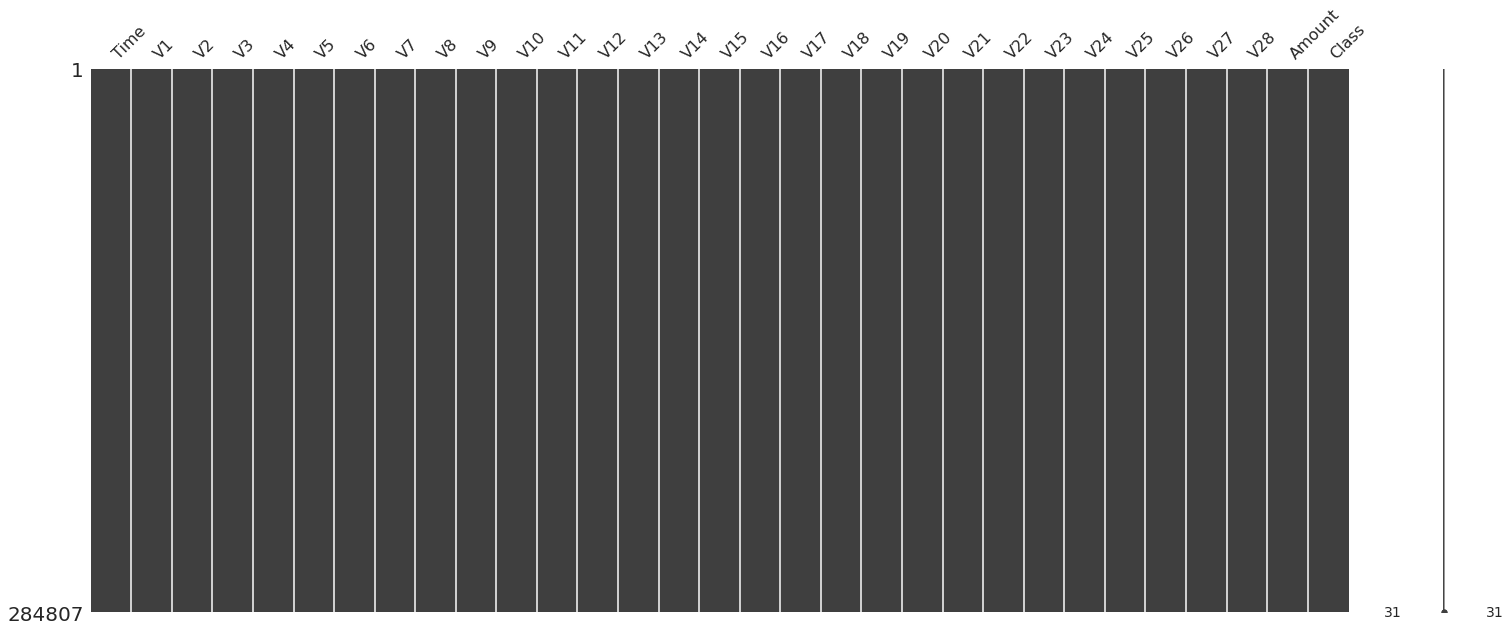

In [8]:
## Visualixzation of Missing Value Information
msno.matrix(df)

In [9]:
## Missing value Handling Stage Completed
## Since there no Data Missing

In [10]:
##Starting Data Analysis Part
## We have columns from Time , Ammount , Class , V1-V28 total 31 columns 
## 30 Feature columns 1 target variable

In [11]:
# QUESTIONS ???
### What is the range of the Numerical features
### Distribution of the Features
### For categorical variables what is the count of each class?
### Data types of the columns

In [12]:
##Data types of the columns
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Classes : [0 1]
Percentage of class 0-Legit : 284315 -> 99.83%
Percentage of class 1-Fraud : 492 -> 0.17%


<AxesSubplot:xlabel='Class', ylabel='count'>

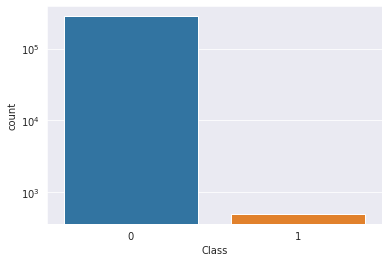

In [13]:
## Class Count 
print("Classes :",df['Class'].unique())
temp = df['Class'].value_counts()
temp_length = len(df)
temp_cls = ['Legit','Fraud']
for cls,count in enumerate(temp):
    print(f"Percentage of class {cls}-{temp_cls[cls]} : {count} -> {round(count/temp_length*100,2)}%")
sns.countplot(df['Class'],log=True)

In [14]:
# The frauds happend are very less
# Assuming all the data provided is legit
# The conclusion is that the percentage of happening a fraud in 0.17%

#=====

## Checking Correlation
# Plotting Correlation matrix for the features and the Target Variable.
# How to interpret the Correlation matrix ??
# Question : How a feature is correlated with another feature or outcome?
#     Especially in the case of Numerical Features the only two thing that can happen to a variable is "Increase" or "Decrease".
#     lets say to find correlation between two variables x1,x2.
#     -> how x2 changes with respect to x1 is their correlation 1) Direction of x2 change 2) In what magnitude it was changing.

# When two input features are highly correlated meanse we have redundent information having that feature in the model provides no extra value instead it will be a burden on model training algorithm.
# When a input variable (Feature) and a Outcome (Target variable) are highly correlated means that varable tells a lot about the outcome and will be very useful in the predition.

# Correlation to itself is always 1

## The goal of correlation matrix :
## Most importantly we want to see the variables which are highly correlated with the outcome variable

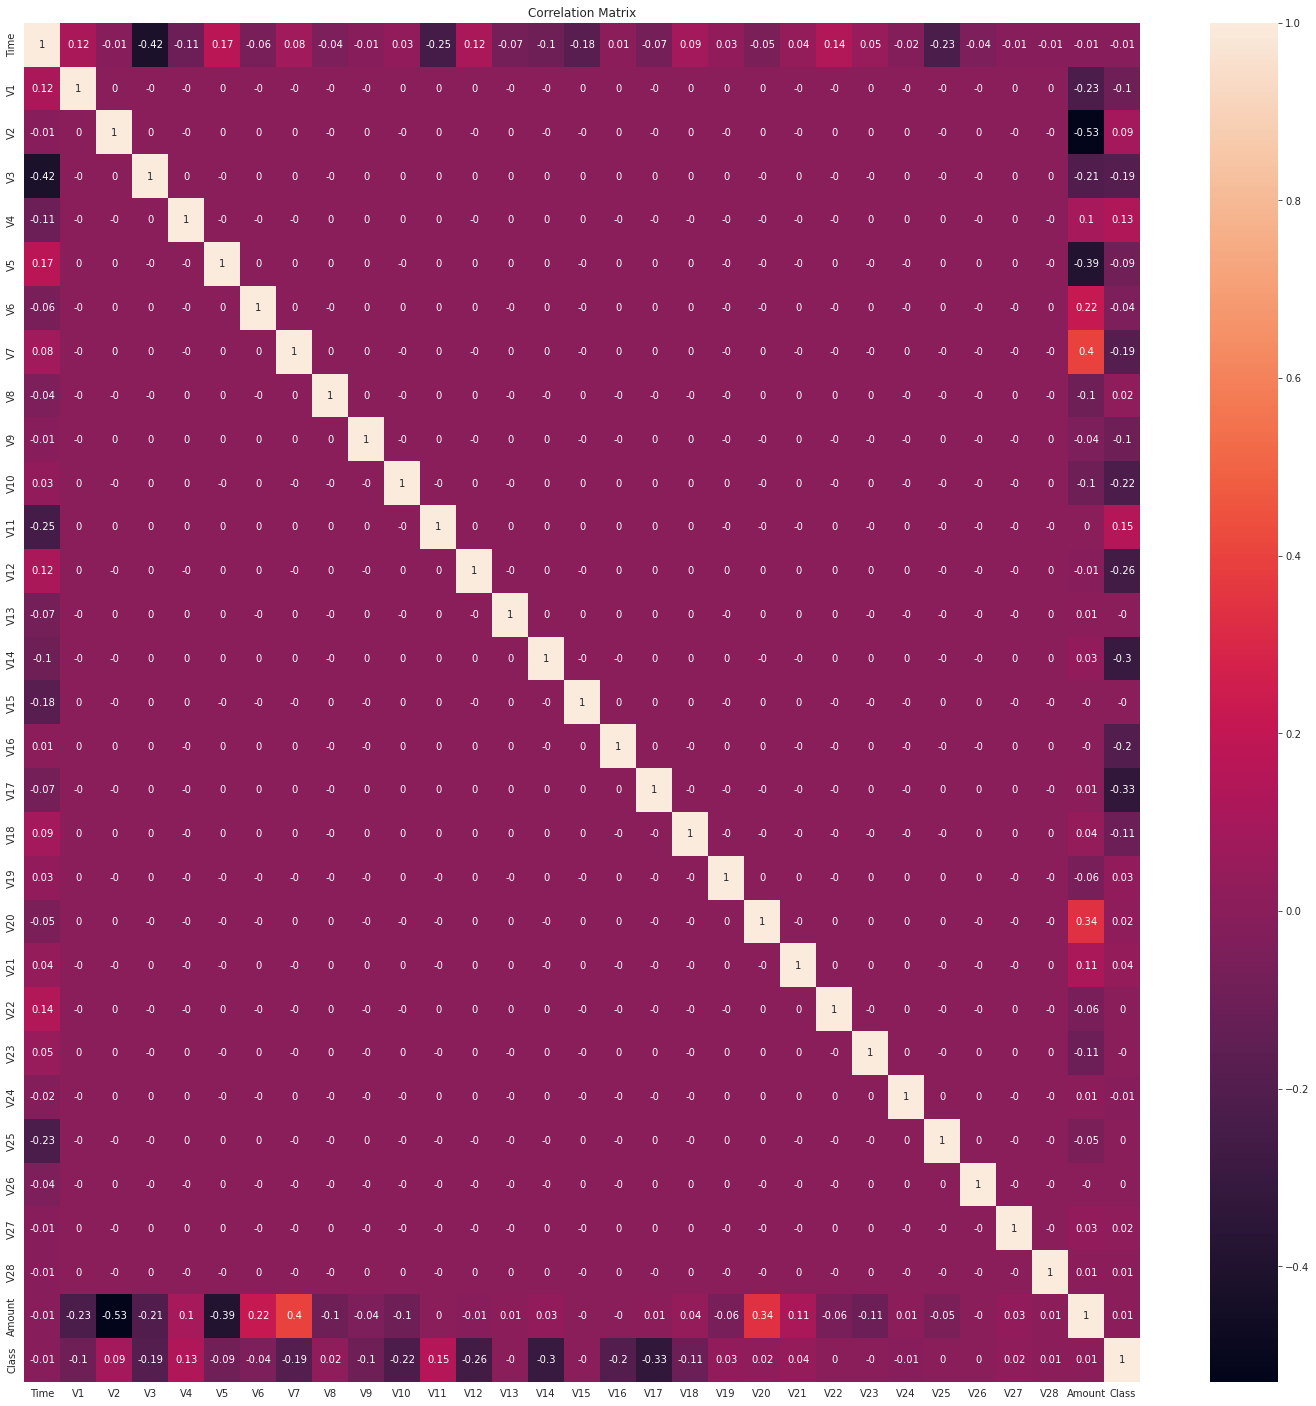

In [15]:
# Configuring the figure size and setting the title
plt.figure(figsize=(25,25))
plt.title("Correlation Matrix")
# Correlation matrix --> using Heatmap Visualization
sns.heatmap(round(df.corr(), 2), annot=True);

In [16]:
## Model Training Part
# Task : Classification
# more specifically : Binary Classification

In [17]:
## Spliting dependent and independent variables
X , y = df.drop(['Class'],axis=1) , df['Class']
## Train Text Split 
# 75 % for training , 25 % for testing
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [18]:
## Next Step : Feature Scaling 
# All the Variables are Numerical
# Using Standard Scalar : Scaling the each variable with mean=0 and Standard-Deviation=1
sc = StandardScaler()
# fit_transform method learns and updates the values
# Learning the Scaling only on training dataset so we can avoid data leakage
X_train = sc.fit_transform(X_train)
# Applying the learned Scaling on test dataset
X_test = sc.transform(X_test)

In [19]:
# Scaled Training and testing Dataset
print("X_train")
print("    Type  : ",type(X_train))
print("    Shape : ",X_train.shape)
print("\nX_test")
print("    Type  : ",type(X_test))
print("    Shape : ",X_test.shape)

X_train
    Type  :  <class 'numpy.ndarray'>
    Shape :  (213605, 30)

X_test
    Type  :  <class 'numpy.ndarray'>
    Shape :  (71202, 30)


In [20]:
## Choosing the Algorithms for Classification Task
# 1. Logistic Regression
# 2. Random Forest Classifier

# Other classification algorithms
# - Decision Trees 
# - Support vector machines
# - K-Nearest Neighbour
# - Naive Bayes

<div style="width: 100%; height: 15px; border-bottom: 10px dotted black; text-align: left;margin:25px 0;">
  <span style="font-size: 30px; background-color: #FFFF; padding-right:23px;font-weight:bold">
    Logistic Regression
  </span>
</div>

In [24]:
%%timeit -r 1 -n 1
# Creating an instance of Logistic Regression
model_logistic_regression = LogisticRegression()
# Training that Instance on the Dataset`
# Fit method is used to learn the features in sklearn
model_logistic_regression.fit(X_train,y_train)

1.84 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [25]:
#1.84 seconds to train the logistic regression

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.88      0.66      0.75       120

    accuracy                           1.00     71202
   macro avg       0.94      0.83      0.88     71202
weighted avg       1.00      1.00      1.00     71202

Accuracy Score:  0.9992696834358585


<AxesSubplot:>

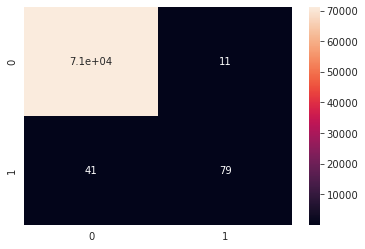

In [26]:
## The Instance has trained successfully
# Now need to Evaluate the Model
# Choosing Evaluation metrics
# Confusion-matrix is one of the evaluation metrics that best descrbes the performance of a Classification task

## prediction from logistic regression model
lg_pred = model_logistic_regression.predict(X_test)
# Classification Report 
print('Classification Report: \n', classification_report(y_test, lg_pred))
# Accuracy 
print('Accuracy Score: ', accuracy_score(y_test, lg_pred))
# Confusion Matrix 
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, lg_pred), annot=True)

<div style="width: 100%; height: 15px; border-bottom: 10px dotted black; text-align: left;margin:25px 0;">
  <span style="font-size: 30px; background-color: #FFFF; padding-right:17px;font-weight:bold">
    Random Forest
  </span>
</div>

In [30]:
# Creating an instance of Random Forest Classifier
model_random_forest = RandomForestClassifier()

In [31]:
%%timeit -r 1 -n 1
# Training that Instance on the Dataset
# Fit method is used to learn the features in sklearn
model_random_forest.fit(X_train,y_train)

2min 21s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [33]:
## took 2 min 21s to train the model

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     71082
           1       0.93      0.78      0.85       120

    accuracy                           1.00     71202
   macro avg       0.96      0.89      0.92     71202
weighted avg       1.00      1.00      1.00     71202

Accuracy Score:  0.999522485323446


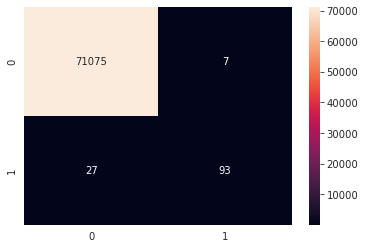

In [34]:
rf_pred = model_random_forest.predict(X_test)

print('Classification Report: \n', classification_report(y_test, rf_pred))
print('Accuracy Score: ', accuracy_score(y_test, rf_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='g');

<div style="width: 100%; height: 15px; border-bottom: 10px dotted black; text-align: left;margin:25px 0;">
  <span style="font-size: 30px; background-color: #FFFF; padding-right:20px;font-weight:bold">
    Saving the model to disc
  </span>
</div>

In [35]:
# Saving the two models
# Libraries to store model to disc 
#    1. pickle 2. joblib
import pickle 
# pickle.dump method to save a python object to dick
with open('model_LogisticRegression-Credit-card-fraud-detection.pkl','wb') as file:
    pickle.dump(model_logistic_regression,file)

with open('model_RandomForest-Credit-card-fraud-detection.pkl','wb') as file:
    pickle.dump(model_random_forest,file)

In [36]:
!ls -l | grep model

-rw-rw-r-- 1 mallikarjun mallikarjun       948 Sep 13 15:45 model_LogisticRegression-Credit-card-fraud-detection.pkl
-rw-rw-r-- 1 mallikarjun mallikarjun   2211634 Sep 13 15:45 model_RandomForest-Credit-card-fraud-detection.pkl


In [37]:
# To load the models use "pickle.load"
with open('model_LogisticRegression-Credit-card-fraud-detection.pkl','rb') as file:
    pkl_model_lg = pickle.load(file)

with open('model_RandomForest-Credit-card-fraud-detection.pkl','rb') as file:
    pkl_model_rf = pickle.load(file)

In [38]:
#Logistic Regression
pkl_model_lg

LogisticRegression()

In [39]:
#Random Forest
pkl_model_rf

RandomForestClassifier()

<div style="width: 100%; height: 20px; border-bottom: 10px dotted black; text-align: center">
  <span style="font-size: 40px; background-color: #FFFF; padding: 0 33px;">
    END
  </span>
</div>

<p style="font-size:20px">Dataset can be downloaded from Kaggle : <a href="Source From Kaggle : https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud">https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud</a></p>